<a href="https://colab.research.google.com/github/Bougriba/Machine-learning-Models-Implementation/blob/main/multiple%2C_polynimial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('Data.csv')
dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
y_pred

array([457.26, 466.72, 440.37, ..., 476.41, 424.62, 463.91])

In [ ]:
regressor.score(X_test,y_test)

0.9321860060402447

In [ ]:
X_train.shape


(7654, 4)

In [ ]:
y_train.shape

(7654,)

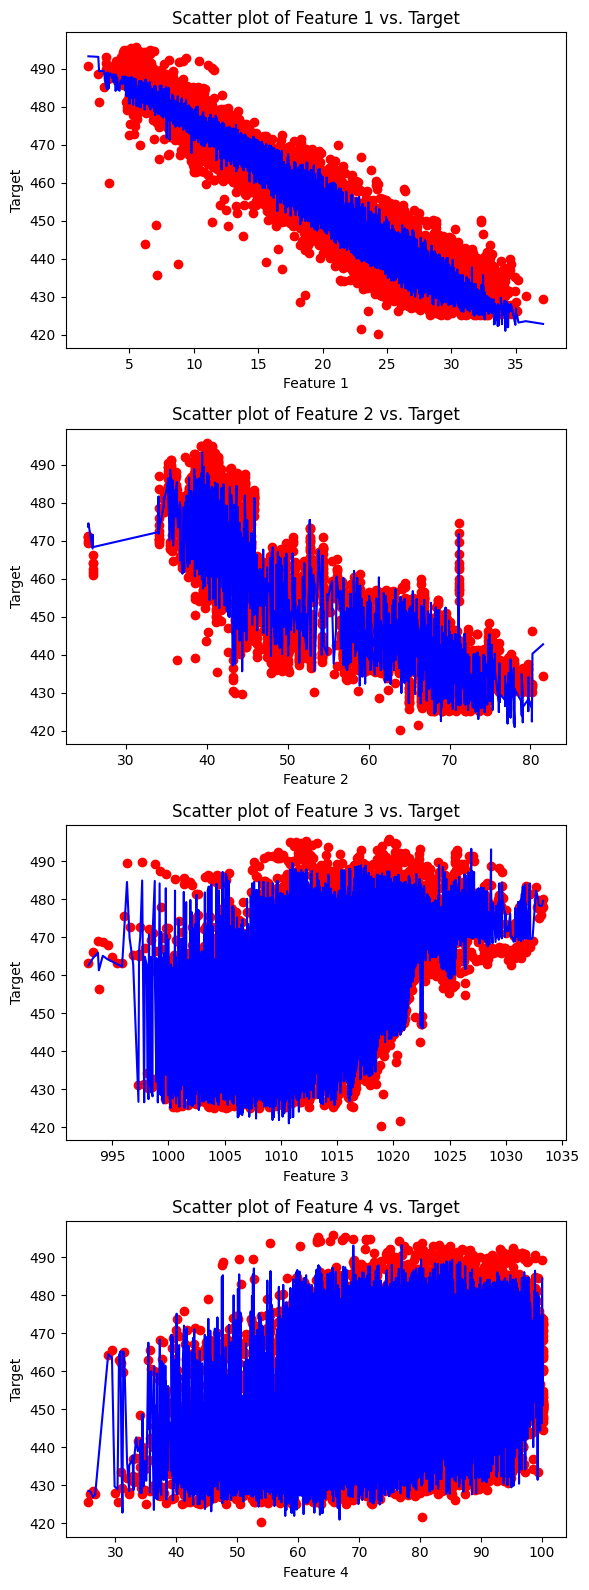

In [ ]:

# Get the number of features
num_features = X_train.shape[1]

# Set up the subplots
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(6, 4*num_features))

# Loop through each feature and create scatter plots
for feature_index in range(num_features):
    feature_values = X_train[:, feature_index]
    ax = axes[feature_index]

    # Scatter plot of the feature against y_train
    ax.scatter(feature_values, y_train, color='red')

    # Set plot labels and title
    ax.set_xlabel(f'Feature {feature_index+1}')
    ax.set_ylabel('Target')
    ax.set_title(f'Scatter plot of Feature {feature_index+1} vs. Target')

    # Plot the linear regression line
    sorted_indices = feature_values.argsort()
    ax.plot(feature_values[sorted_indices], regressor.predict(X_train)[sorted_indices], color='blue')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate ( ( y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1) ),1))

[[457.26 458.96]
 [466.72 463.29]
 [440.37 435.27]
 ...
 [476.41 476.22]
 [424.62 440.29]
 [463.91 467.92]]


In [ ]:
regressor.score(X_train,y_train)

0.9277745463518707

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9321860060402447

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
X_poly_train=poly_reg.fit_transform(X_train)
X_poly_test=poly_reg.fit_transform(X_test)
regressor.fit(X_poly_train,y_train)

LinearRegression()

In [ ]:
print(X_poly_train)
print(X_poly_test)

[[1.00e+00 6.61e+00 3.89e+01 ... 8.79e+09 7.99e+08 7.26e+07]
 [1.00e+00 2.27e+01 6.56e+01 ... 5.12e+09 3.56e+08 2.47e+07]
 [1.00e+00 1.01e+01 3.96e+01 ... 5.11e+09 3.53e+08 2.43e+07]
 ...
 [1.00e+00 1.86e+01 3.95e+01 ... 4.79e+09 3.26e+08 2.22e+07]
 [1.00e+00 2.30e+01 4.50e+01 ... 2.65e+09 1.33e+08 6.66e+06]
 [1.00e+00 2.05e+01 4.97e+01 ... 5.11e+09 3.58e+08 2.51e+07]]
[[1.00e+00 1.79e+01 4.46e+01 ... 7.69e+09 6.70e+08 5.84e+07]
 [1.00e+00 1.63e+01 4.23e+01 ... 2.83e+09 1.48e+08 7.77e+06]
 [1.00e+00 2.60e+01 7.03e+01 ... 3.30e+09 1.87e+08 1.06e+07]
 ...
 [1.00e+00 1.07e+01 3.84e+01 ... 5.45e+09 3.86e+08 2.74e+07]
 [1.00e+00 3.40e+01 7.36e+01 ... 2.64e+09 1.34e+08 6.80e+06]
 [1.00e+00 1.53e+01 4.46e+01 ... 7.13e+09 5.83e+08 4.76e+07]]


In [ ]:
y_pred_poly_reg=regressor.predict(X_poly_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate ( ( y_pred_poly_reg.reshape(len(y_pred_poly_reg),1),y_test.reshape(len(y_test),1) ),1))

[[456.08 458.96]
 [462.8  463.29]
 [438.33 435.27]
 ...
 [476.32 476.22]
 [432.68 440.29]
 [464.56 467.92]]


In [ ]:
r2_score(y_test,y_pred_poly_reg)

0.9447339949118178